# **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G-SliciNdd.zip')
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC,Malicious


In [3]:
data['predicted'].unique()

array(['3:URLLC', '2:mMTC', '1:eMBB'], dtype=object)

In [4]:
# Remove 'Label' column if it exists
if 'Label' in data.columns:
    data = data.drop('Label', axis=1)

# Rename the target column for clarity
data = data.rename(columns={'predicted': 'SliceType'})

# **Model trained on all the features**

In [5]:
df = data.copy()
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


In [6]:
# Basic preprocessing

# Handle null values
df = df.fillna(0)  # Replace NaN with 0, you might want to use a different strategy

# Separate features and target
X = df.drop('SliceType', axis=1)
y = df['SliceType'].apply(lambda x: x.split(':')[1])

# Encode categorical variables
le = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Split the data
X_ignore, X_temp, y_ignore, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred

array(['URLLC', 'mMTC', 'mMTC', ..., 'mMTC', 'mMTC', 'mMTC'], dtype=object)

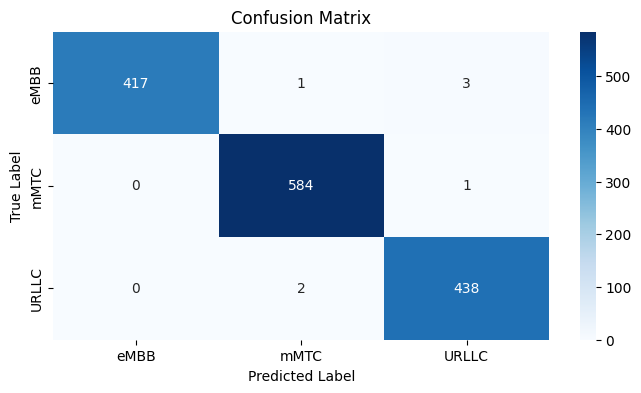

              precision    recall  f1-score   support

       URLLC     1.0000    0.9905    0.9952       421
        eMBB     0.9949    0.9983    0.9966       585
        mMTC     0.9910    0.9955    0.9932       440

    accuracy                         0.9952      1446
   macro avg     0.9953    0.9947    0.9950      1446
weighted avg     0.9952    0.9952    0.9952      1446



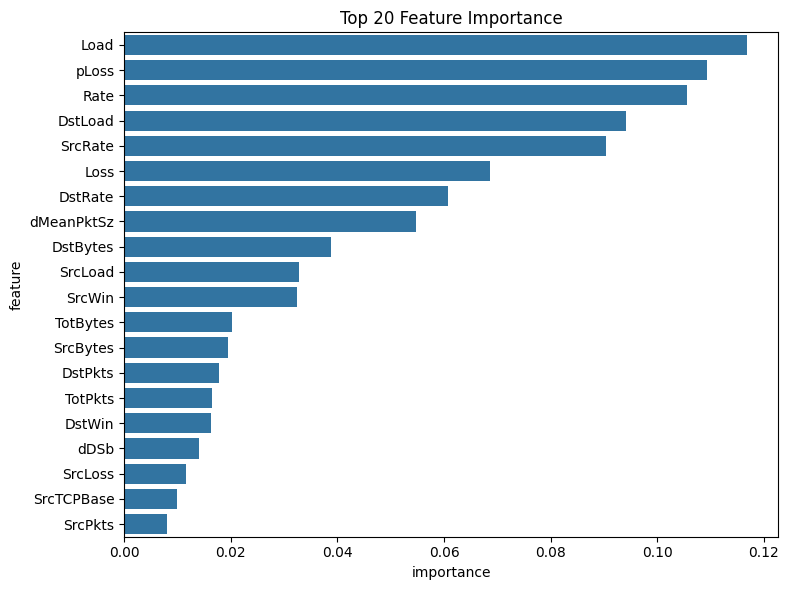


Top 10 Important Features:
       feature  importance
27        Load    0.116867
33       pLoss    0.109381
36        Rate    0.105569
29     DstLoad    0.094060
37     SrcRate    0.090452
30        Loss    0.068592
38     DstRate    0.060725
26  dMeanPktSz    0.054714
23    DstBytes    0.038792
28     SrcLoad    0.032771


In [8]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

## **Cross validation**

In [9]:
# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# # Perform 5-fold cross-validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring=scoring)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=scoring)

# Print cross-validation results
print("Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Scores: {scores}")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

# # Print cross-validation results
# print("Cross-validation scores:", cv_scores)
# print("Mean CV score:", cv_scores.mean())
# print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation results:
accuracy:
  Scores: [0.99861687 0.9996541  0.9986164  0.9989623  0.9989623 ]
  Mean: 0.998962
  Std Dev: 0.000379

precision_macro:
  Scores: [0.99870449 0.99963925 0.99863156 0.99892009 0.99906612]
  Mean: 0.998992
  Std Dev: 0.000358

recall_macro:
  Scores: [0.9985778  0.99958695 0.99865159 0.99901271 0.99881173]
  Mean: 0.998928
  Std Dev: 0.000362

f1_macro:
  Scores: [0.99864096 0.99961287 0.998641   0.99896515 0.99893817]
  Mean: 0.998960
  Std Dev: 0.000355




Top 20 Important Features:
       feature  importance
36        Rate    0.134449
27        Load    0.134417
33       pLoss    0.125228
30        Loss    0.088233
29     DstLoad    0.074033
38     DstRate    0.050254
37     SrcRate    0.048865
26  dMeanPktSz    0.038550
40      SrcWin    0.037959
28     SrcLoad    0.032311
21    TotBytes    0.028941
20     DstPkts    0.023395
23    DstBytes    0.022146
31     SrcLoss    0.021866
22    SrcBytes    0.018623
41      DstWin    0.016533
18     TotPkts    0.014185
12        dDSb    0.009449
32     DstLoss    0.009378
19     SrcPkts    0.008292


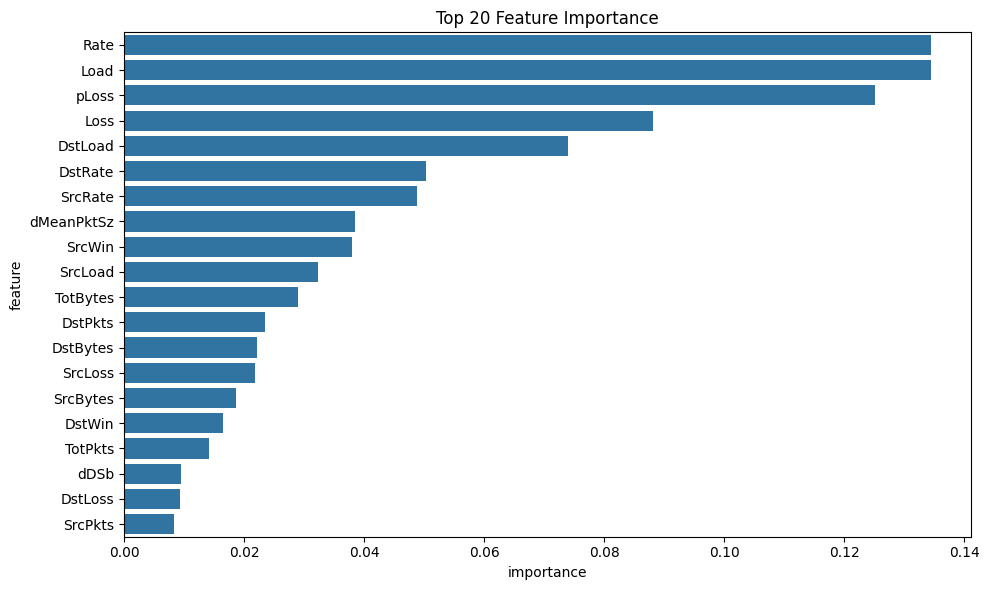

In [10]:
# Train the model on the full dataset for feature importance
rf_model.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Important Features:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

## **Model trained on Top 20/10/5 important features**

In [11]:
# Get the top 20 features
top_features = feature_importance['feature'].head(10).tolist()

# Create a new dataset with only the top 20 features
X_top_features = X[top_features]
X_top_features

,Rate,Load,pLoss,Loss,DstLoad,DstRate,SrcRate,dMeanPktSz,SrcWin,SrcLoad
0,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.390587,131.237137,0.000000,0.000000,0.000000,0.000000,0.390587,0.000000,0.0,131.237137
3,108.662582,84843.742190,0.000000,0.000000,23297.257810,43.465034,43.465034,66.666664,0.0,61546.484380
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
14451,3.821267,2415.138241,10.105935,2.000000,901.270514,1.594339,2.019412,68.162787,64256.0,1613.406298
14452,3.722216,2471.046868,9.210293,1.257694,763.222253,1.400239,2.029394,67.734197,64256.0,1553.066132
14453,3.840632,2283.097961,10.360201,2.000000,855.459521,1.626468,2.037339,68.009158,64256.0,1774.842835
14454,3.244096,2106.446226,7.659634,1.609694,699.197109,1.408035,1.797084,67.815812,64256.0,1354.903131


Classification Report:
              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00       421
        eMBB       0.99      1.00      0.99       585
        mMTC       0.99      0.98      0.99       440

    accuracy                           0.99      1446
   macro avg       0.99      0.99      0.99      1446
weighted avg       0.99      0.99      0.99      1446


Cross-validation results:
accuracy:
  Mean: 0.999170
  Std Dev: 0.000415

precision_macro:
  Mean: 0.999153
  Std Dev: 0.000413

recall_macro:
  Mean: 0.999166
  Std Dev: 0.000419

f1_macro:
  Mean: 0.999159
  Std Dev: 0.000415



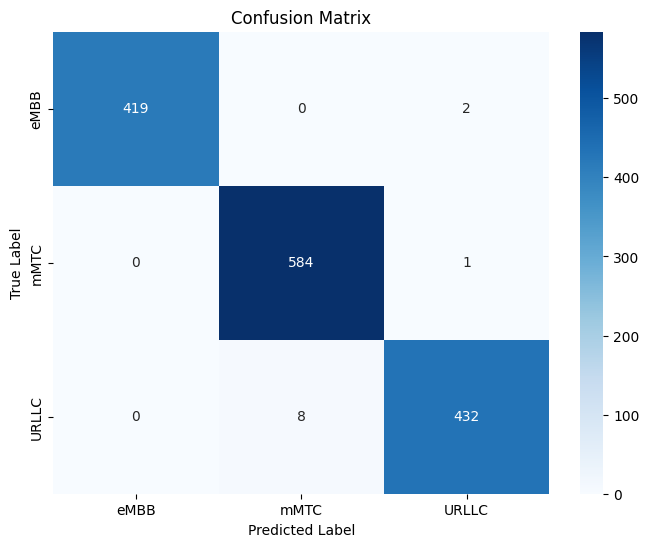

In [12]:
# Split the data
X_ignore, X_temp, y_ignore, y_temp = train_test_split(X_top_features, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a new Random Forest model
rf_model_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_top_features.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_top_features.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_top_features, X_top_features, y, cv=cv, scoring=scoring)

# Print cross-validation results
print("\nCross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# **Advanced data pre-processing + Model evaluation**

In [ ]:
df = data.copy()
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


In [ ]:
X = df.drop('SliceType', axis=1)
y = df['SliceType'].apply(lambda x: x.split(':')[1])

In [ ]:
# Handle NaN values
nan_counts = df.isna().sum()
nan_percentages = 100 * df.isna().sum() / len(df)

print("NaN counts and percentages:")
for col, count in nan_counts.items():
    if count > 0:
        print(f"{col}: {count} ({nan_percentages[col]:.2f}%)")

NaN counts and percentages:
sTos: 1 (0.01%)
dTos: 3887 (26.89%)
sTtl: 1 (0.01%)
dTtl: 3923 (27.14%)
sHops: 1 (0.01%)
dHops: 3899 (26.97%)
SrcGap: 3113 (21.53%)
DstGap: 3113 (21.53%)
SrcWin: 3230 (22.34%)
DstWin: 4243 (29.35%)
sVid: 14082 (97.41%)
dVid: 14452 (99.97%)
SrcTCPBase: 3113 (21.53%)
DstTCPBase: 4384 (30.33%)


In [ ]:
# Create indicator variables
for col in ['dTos', 'dTtl', 'dHops', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'SrcTCPBase', 'DstTCPBase']:
    X[f'{col}_missing'] = X[col].isna().astype(int)

# Drop columns with high NaN percentages
X = X.drop(['sVid', 'dVid'], axis=1)

# Impute low NaN percentage columns
X['sTos'].fillna(X['sTos'].median(), inplace=True)
X['sTtl'].fillna(X['sTtl'].median(), inplace=True)
X['sHops'].fillna(X['sHops'].median(), inplace=True)

# Use KNN imputer for moderate NaN percentage columns
columns_to_impute = ['dTos', 'dTtl', 'dHops', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'SrcTCPBase', 'DstTCPBase']
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

X_scaled = scaler.fit_transform(X[columns_to_impute])
X_imputed = imputer.fit_transform(X_scaled)
X[columns_to_impute] = scaler.inverse_transform(X_imputed)
X

<ipython-input-7-605bcde45f3a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['sTos'].fillna(X['sTos'].median(), inplace=True)
<ipython-input-7-605bcde45f3a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,UniqueID,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,1.443790e+05,0,0,0,1,1,1,1,1,1
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,1.816910e+05,1,1,1,1,1,1,1,1,1
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,1.755800e+05,1,1,1,1,1,1,1,1,1
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,1.202390e+05,0,0,0,1,1,1,1,1,1
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,3.486120e+05,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,2.373585e+06,0,0,0,0,0,0,0,0,0
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,2.367298e+06,0,0,0,0,0,0,0,0,0
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,2.383580e+06,0,0,0,0,0,0,0,0,0
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,2.384146e+06,0,0,0,0,0,0,0,0,0


In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,UniqueID,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,1.443790e+05,0,0,0,1,1,1,1,1,1
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1.816910e+05,1,1,1,1,1,1,1,1,1
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,1.755800e+05,1,1,1,1,1,1,1,1,1
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,1.202390e+05,0,0,0,1,1,1,1,1,1
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,3.486120e+05,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0.0,...,2.373585e+06,0,0,0,0,0,0,0,0,0
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0.0,...,2.367298e+06,0,0,0,0,0,0,0,0,0
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0.0,...,2.383580e+06,0,0,0,0,0,0,0,0,0
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0.0,...,2.384146e+06,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the data
X_ignore, X_temp, y_ignore, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest model
rf_model_optmz = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_optmz.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_optmz.predict(X_test)
y_pred

array(['URLLC', 'mMTC', 'mMTC', ..., 'mMTC', 'mMTC', 'mMTC'], dtype=object)

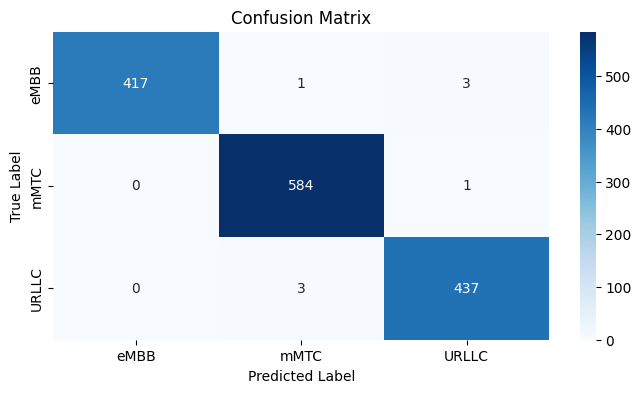

              precision    recall  f1-score   support

       URLLC       1.00      0.99      1.00       421
        eMBB       0.99      1.00      1.00       585
        mMTC       0.99      0.99      0.99       440

    accuracy                           0.99      1446
   macro avg       0.99      0.99      0.99      1446
weighted avg       0.99      0.99      0.99      1446



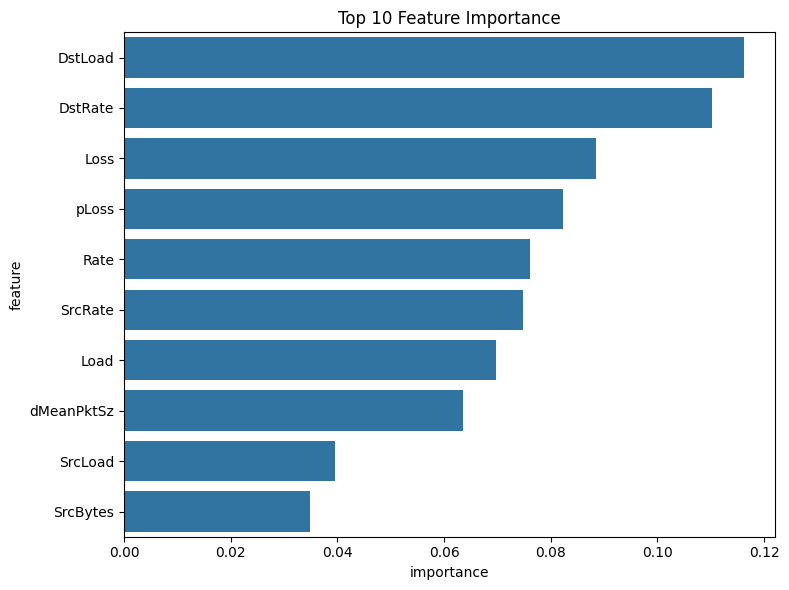


Top 10 Important Features:
       feature  importance
29     DstLoad    0.116146
38     DstRate    0.110142
30        Loss    0.088395
33       pLoss    0.082221
36        Rate    0.076095
37     SrcRate    0.074869
27        Load    0.069683
26  dMeanPktSz    0.063454
28     SrcLoad    0.039479
22    SrcBytes    0.034835


In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_optmz.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

## **Cross validation**

In [ ]:
# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_optmz, X, y, cv=cv, scoring=scoring)

# Print cross-validation results
print("Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Scores: {scores}")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

Cross-validation results:
accuracy:
  Scores: [0.99861687 0.9996541  0.9986164  0.9989623  0.9986164 ]
  Mean: 0.998893
  Std Dev: 0.000403

precision_macro:
  Scores: [0.99870449 0.99963925 0.99856167 0.99892009 0.99870576]
  Mean: 0.998906
  Std Dev: 0.000384

recall_macro:
  Scores: [0.9985778  0.99958695 0.99872562 0.99901271 0.99839816]
  Mean: 0.998860
  Std Dev: 0.000415

f1_macro:
  Scores: [0.99864096 0.99961287 0.9986414  0.99896515 0.99855046]
  Mean: 0.998882
  Std Dev: 0.000392



## **Model trained on Top 20/10/5 important features**

In [ ]:
# Get the top features
top_features = feature_importance['feature'].head(10).tolist()
top_features = top_features[1:8]
top_features

['DstRate', 'Loss', 'pLoss', 'Rate', 'SrcRate', 'Load', 'dMeanPktSz']

In [ ]:
# Create a new dataset with only the top features
X_top_features = X[top_features]
X_top_features

,DstRate,Loss,pLoss,Rate,SrcRate,Load,dMeanPktSz
0,0.000000,0.000000,0.000000,3460.207764,0.000000,0.000000,60.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.390587,0.390587,131.237137,0.000000
3,43.465034,0.000000,0.000000,108.662582,43.465034,84843.742190,66.666664
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
14451,1.594339,2.000000,10.105935,3.821267,2.019412,2415.138241,68.162787
14452,1.400239,1.257694,9.210293,3.722216,2.029394,2471.046868,67.734197
14453,1.626468,2.000000,10.360201,3.840632,2.037339,2283.097961,68.009158
14454,1.408035,1.609694,7.659634,3.244096,1.797084,2106.446226,67.815812


Classification Report:
              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00       421
        eMBB       0.98      1.00      0.99       585
        mMTC       1.00      0.97      0.99       440

    accuracy                           0.99      1446
   macro avg       0.99      0.99      0.99      1446
weighted avg       0.99      0.99      0.99      1446


Cross-validation results (Top Features):
accuracy:
  Mean: 0.997994
  Std Dev: 0.000671

precision_macro:
  Mean: 0.998266
  Std Dev: 0.000611

recall_macro:
  Mean: 0.997879
  Std Dev: 0.000722

f1_macro:
  Mean: 0.998069
  Std Dev: 0.000667



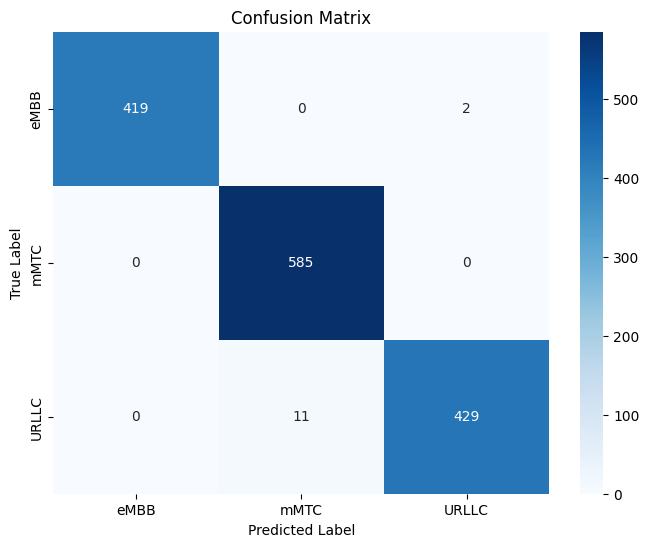

In [ ]:
# Split the data
X_ignore, X_temp, y_ignore, y_temp = train_test_split(X_top_features, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a new Random Forest model
rf_model_optmz_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_optmz_top_features.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_optmz_top_features.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_optmz_top_features, X_top_features, y, cv=cv, scoring=scoring)

# Print cross-validation results (Top Features)
print("\nCross-validation results (Top Features):")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **Class distribution analysis**

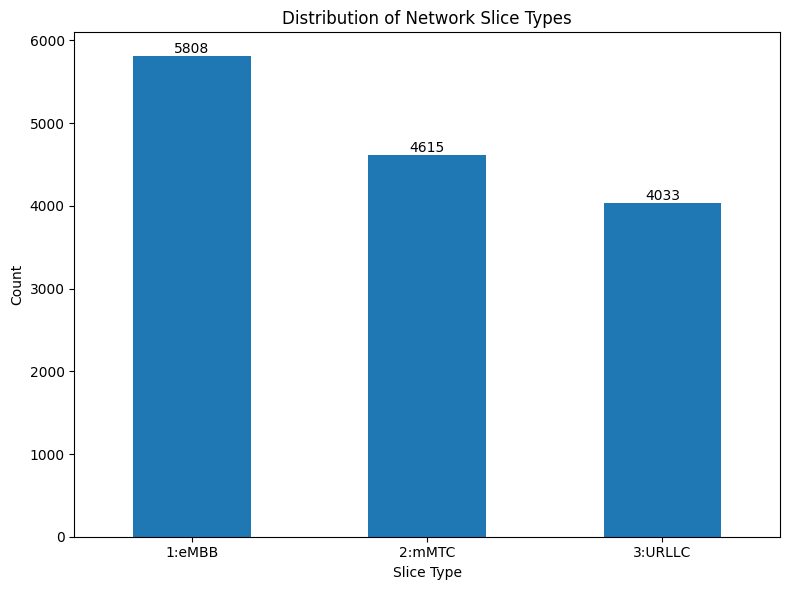

Percentage distribution of slice types:
SliceType
1:eMBB     40.177089
2:mMTC     31.924460
3:URLLC    27.898450
Name: count, dtype: float64


In [ ]:
# Count the occurrences of each slice type
slice_counts = df['SliceType'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
slice_counts.plot(kind='bar')
plt.title('Distribution of Network Slice Types')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(slice_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print percentage distribution
print("Percentage distribution of slice types:")
print(slice_counts / len(df) * 100)

## **Feature distribution analysis**

In [ ]:
df = X
df['SliceType'] = y
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,0,0,0,1,1,1,1,1,1,URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,0,0,0,1,1,1,1,1,1,URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

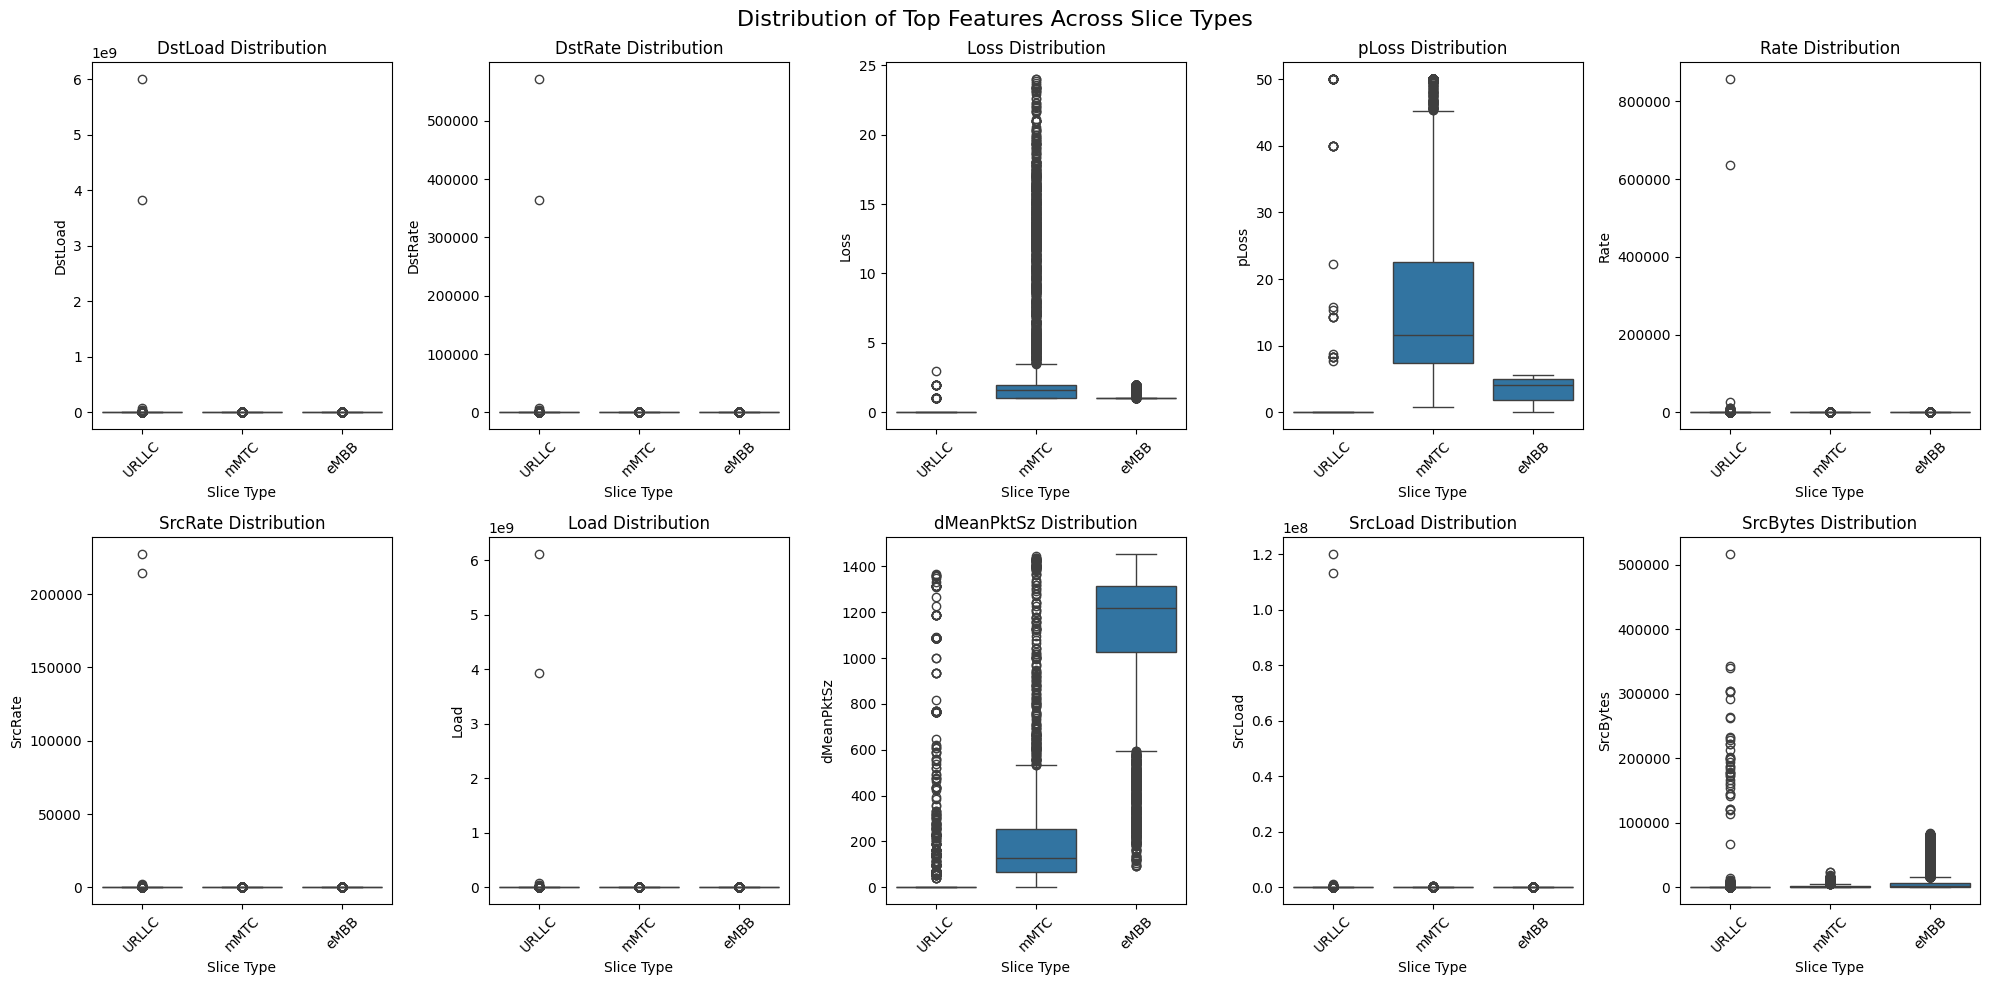

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

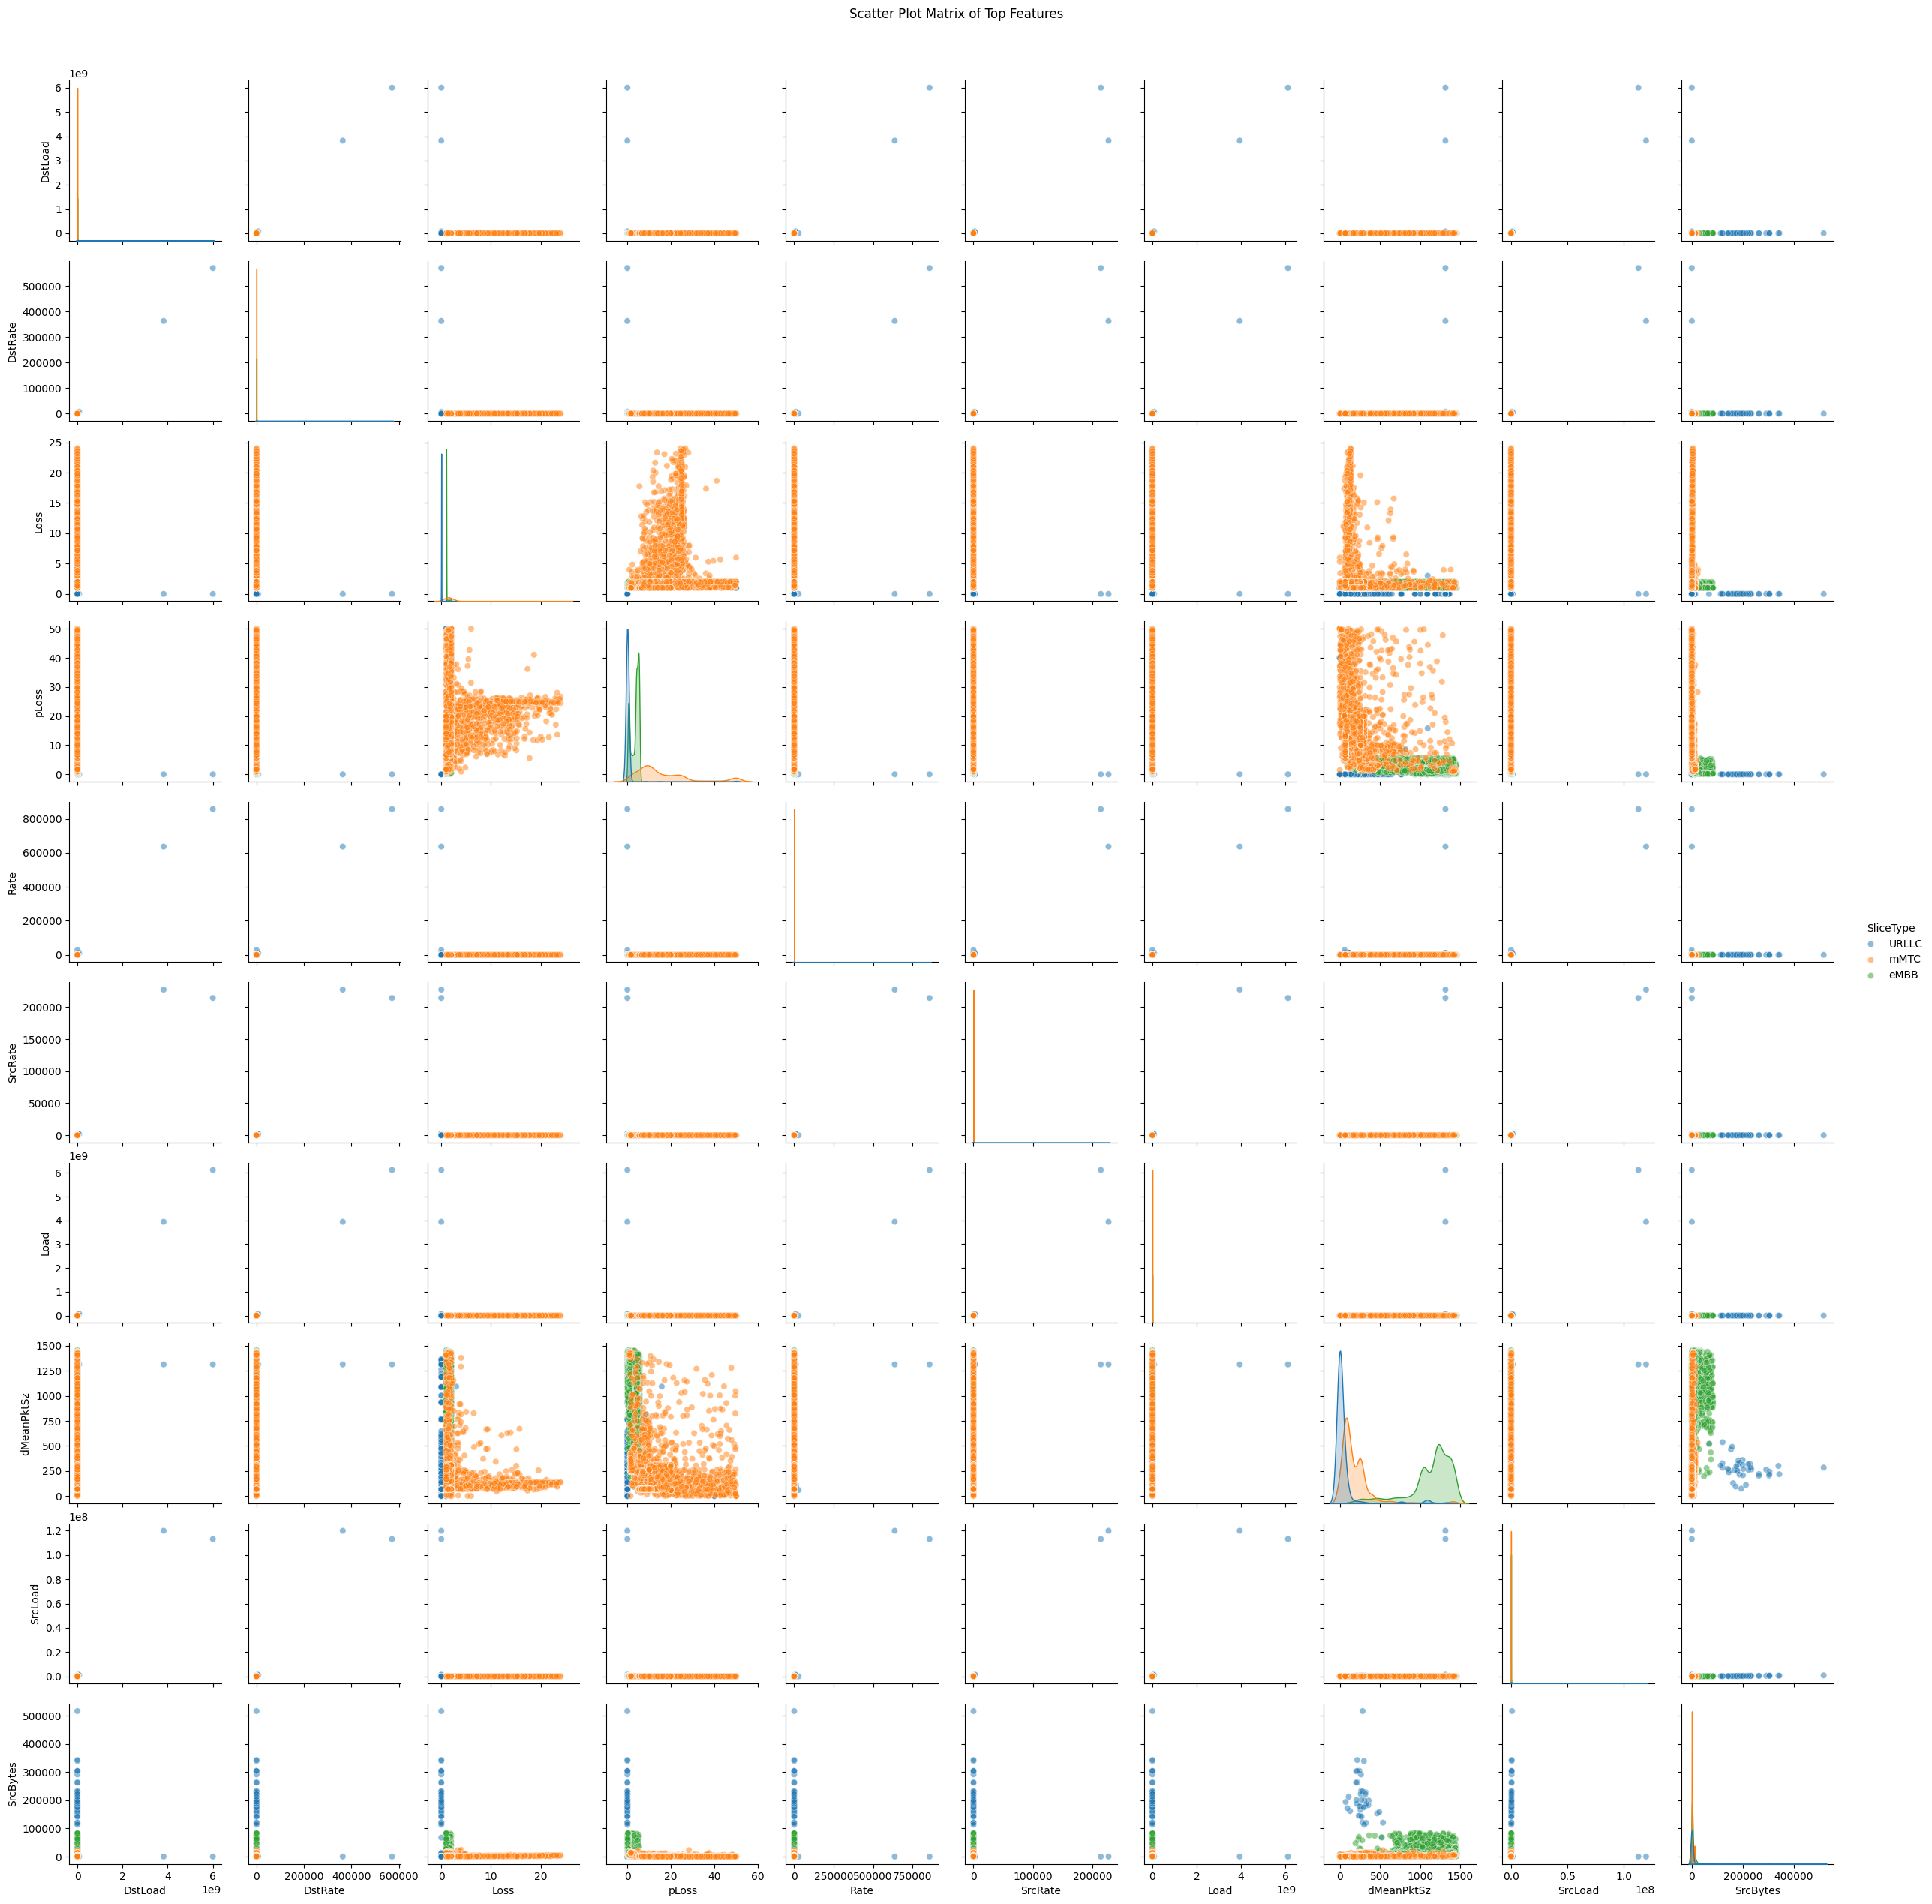

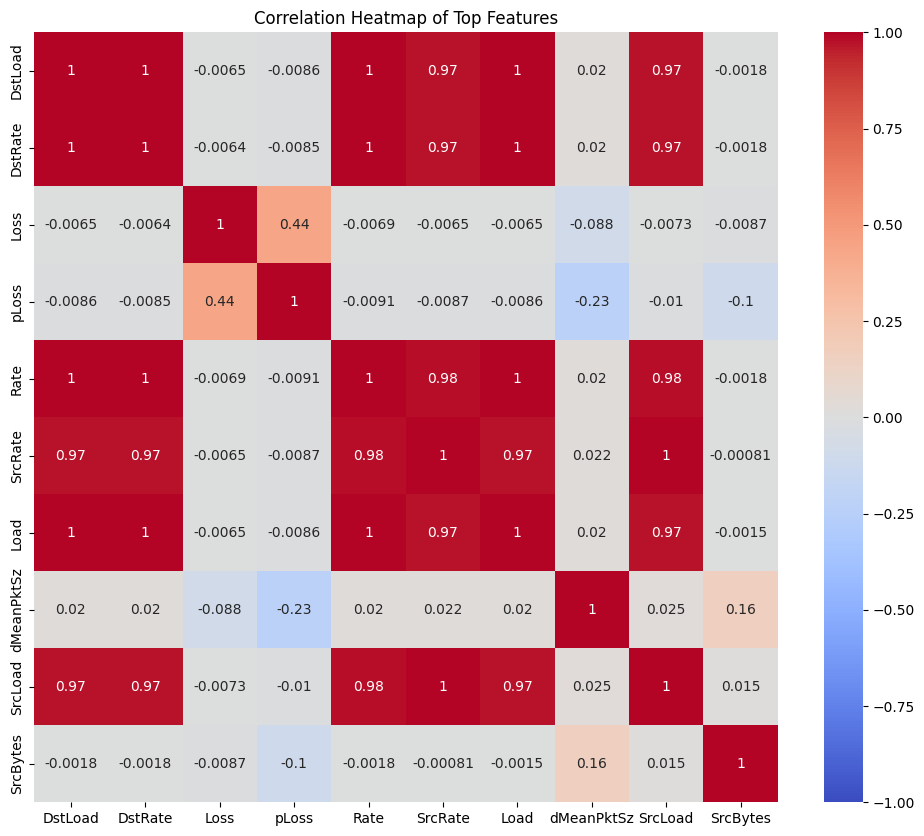

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Distribution of Top Features Across Slice Types', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each feature
for i, feature in enumerate(top_features):
    sns.boxplot(x='SliceType', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel('Slice Type')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(top_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Scatter plot matrix
sns.pairplot(df[top_features + ['SliceType']], hue='SliceType', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plot Matrix of Top Features', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = df[top_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Top Features')
plt.show()

# **Quick data pre-processing + Model evaluation**

In [ ]:
df = data.copy()
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


In [ ]:
# Handle NaN values
nan_counts = df.isna().sum()
nan_percentages = 100 * df.isna().sum() / len(df)

print("NaN counts and percentages:")
for col, count in nan_counts.items():
    if count > 0:
        print(f"{col}: {count} ({nan_percentages[col]:.2f}%)")

NaN counts and percentages:
sTos: 1 (0.01%)
dTos: 3887 (26.89%)
sTtl: 1 (0.01%)
dTtl: 3923 (27.14%)
sHops: 1 (0.01%)
dHops: 3899 (26.97%)
SrcGap: 3113 (21.53%)
DstGap: 3113 (21.53%)
SrcWin: 3230 (22.34%)
DstWin: 4243 (29.35%)
sVid: 14082 (97.41%)
dVid: 14452 (99.97%)
SrcTCPBase: 3113 (21.53%)
DstTCPBase: 4384 (30.33%)


In [ ]:
# Drop columns with high NaN percentages
df = df.drop(['sVid', 'dVid'], axis=1)

# Remove rows with NaN values from the remaining columns
df = df.dropna(subset=['sTos', 'sTtl', 'sHops', 'dTos', 'dTtl', 'dHops', 'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'SrcTCPBase', 'DstTCPBase'])

# X_scaled = scaler.fit_transform(X[columns_to_impute])
# X_imputed = imputer.fit_transform(X_scaled)
# X[columns_to_impute] = scaler.inverse_transform(X_imputed)
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
40,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,tcp,0.0,...,CON,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05,3:URLLC
134,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,tcp,0.0,...,CON,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05,3:URLLC
174,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,tcp,0.0,...,FIN,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05,3:URLLC
237,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,tcp,0.0,...,CON,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05,3:URLLC
242,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,tcp,0.0,...,CON,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,CON,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,CON,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,CON,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,CON,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


In [ ]:
# Check NaN values
nan_counts = X.isna().sum()
nan_percentages = 100 * X.isna().sum() / len(X)

print("NaN counts and percentages:")
for col, count in nan_counts.items():
    if count > 0:
        print(f"{col}: {count} ({nan_percentages[col]:.2f}%)")

NaN counts and percentages:


In [ ]:
X = df.drop('SliceType', axis=1)
y = df['SliceType'].apply(lambda x: x.split(':')[1])

In [ ]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Remove categorical columns
X = X.drop(categorical_columns, axis=1)
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
40,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
134,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
174,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
237,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
242,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [ ]:
# Split the data
X_ignore, X_temp, y_ignore, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest model
rf_model_optmz = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_optmz.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_optmz.predict(X_test)
y_pred

array(['eMBB', 'mMTC', 'eMBB', 'mMTC', 'mMTC', 'mMTC', 'mMTC', 'mMTC',
       'eMBB', 'mMTC', 'URLLC', 'eMBB', 'mMTC', 'eMBB', 'mMTC', 'eMBB',
       'eMBB', 'eMBB', 'eMBB', 'mMTC', 'mMTC', 'eMBB', 'eMBB', 'eMBB',
       'mMTC', 'URLLC', 'URLLC', 'eMBB', 'eMBB', 'mMTC', 'eMBB', 'eMBB',
       'eMBB', 'mMTC', 'eMBB', 'eMBB', 'mMTC', 'mMTC', 'eMBB', 'mMTC',
       'mMTC', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB',
       'eMBB', 'mMTC', 'eMBB', 'eMBB', 'eMBB', 'mMTC', 'eMBB', 'mMTC',
       'mMTC', 'eMBB', 'mMTC', 'eMBB', 'eMBB', 'mMTC', 'eMBB', 'eMBB',
       'mMTC', 'mMTC', 'mMTC', 'eMBB', 'eMBB', 'mMTC', 'mMTC', 'eMBB',
       'eMBB', 'eMBB', 'eMBB', 'mMTC', 'eMBB', 'mMTC', 'URLLC', 'eMBB',
       'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB',
       'eMBB', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'mMTC', 'eMBB', 'mMTC',
       'eMBB', 'eMBB', 'eMBB', 'mMTC', 'mMTC', 'eMBB', 'mMTC', 'eMBB',
       'eMBB', 'eMBB', 'eMBB', 'mMTC', 'eMBB', 'eMBB', 'mMTC', 'mMTC',
  

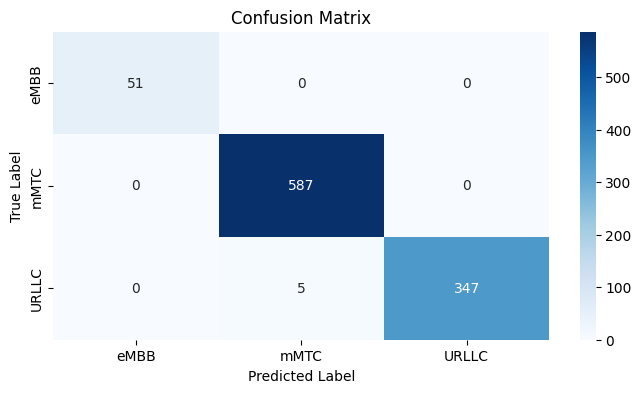

              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00        51
        eMBB       0.99      1.00      1.00       587
        mMTC       1.00      0.99      0.99       352

    accuracy                           0.99       990
   macro avg       1.00      1.00      1.00       990
weighted avg       0.99      0.99      0.99       990



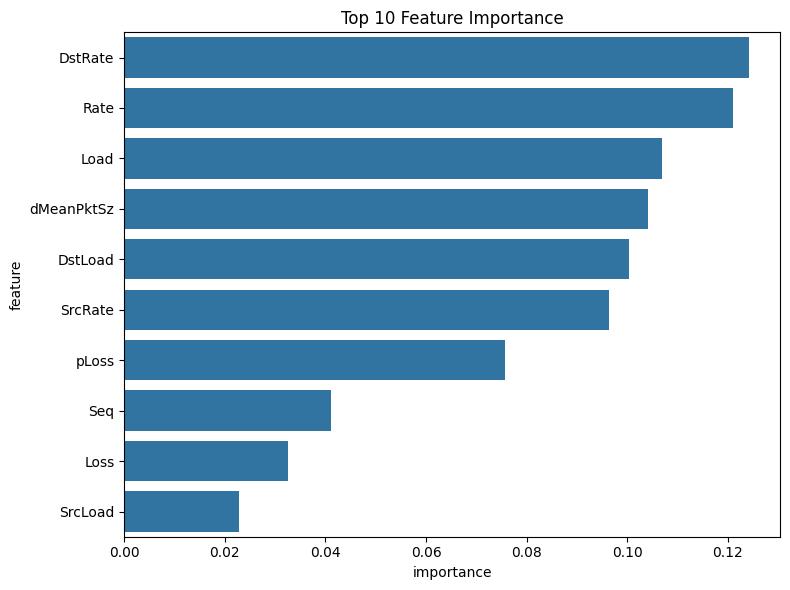


Top 10 Important Features:
       feature  importance
34     DstRate    0.124131
32        Rate    0.120926
23        Load    0.106950
22  dMeanPktSz    0.104035
25     DstLoad    0.100298
33     SrcRate    0.096308
29       pLoss    0.075663
1          Seq    0.041054
26        Loss    0.032544
24     SrcLoad    0.022877


In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_optmz.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

## **Cross validation**

In [ ]:
# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_optmz, X, y, cv=cv, scoring=scoring)

# Print cross-validation results
print("Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Scores: {scores}")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

Cross-validation results:
accuracy:
  Scores: [0.9979798  0.99848485 0.9979798  0.99848485 0.9989899 ]
  Mean: 0.998384
  Std Dev: 0.000378

precision_macro:
  Scores: [0.99847796 0.99876726 0.99847845 0.99876751 0.99942726]
  Mean: 0.998784
  Std Dev: 0.000347

recall_macro:
  Scores: [0.99589101 0.99396576 0.99586627 0.99391604 0.99905168]
  Mean: 0.995738
  Std Dev: 0.001870

f1_macro:
  Scores: [0.9971782  0.99634086 0.99716597 0.99631568 0.99923855]
  Mean: 0.997248
  Std Dev: 0.001065



## **Model trained on Top 20/10/5 important features**

In [ ]:
# Get the top features
top_features = feature_importance['feature'].head(10).tolist()
# top_features = top_features[1:8]
top_features

['DstRate',
 'Rate',
 'Load',
 'dMeanPktSz',
 'DstLoad',
 'SrcRate',
 'pLoss',
 'Seq',
 'Loss',
 'SrcLoad']

In [ ]:
# Create a new dataset with only the top features
X_top_features = X[top_features]
X_top_features

,DstRate,Rate,Load,dMeanPktSz,DstLoad,SrcRate,pLoss,Seq,Loss,SrcLoad
40,30.069990,67.657478,100734.460900,234.399994,56411.300780,30.069990,0.000000,24.000000,0.000000,44323.164060
134,0.000000,915.750854,0.000000,66.000000,0.000000,0.000000,0.000000,250.000000,0.000000,0.000000
174,71.017685,284.070740,124422.976600,66.000000,37497.335940,142.035370,0.000000,1959.000000,0.000000,86925.640630
237,30.099403,67.723656,100772.804700,234.399994,56466.480470,30.099403,0.000000,14.000000,0.000000,44306.324220
242,7.099590,12.495278,37226.843750,254.769226,14471.804690,5.111705,0.000000,7.000000,0.000000,22755.037110
...,...,...,...,...,...,...,...,...,...,...
14451,1.594339,3.821267,2415.138241,68.162787,901.270514,2.019412,10.105935,281.829734,2.000000,1613.406298
14452,1.400239,3.722216,2471.046868,67.734197,763.222253,2.029394,9.210293,298.318232,1.257694,1553.066132
14453,1.626468,3.840632,2283.097961,68.009158,855.459521,2.037339,10.360201,293.324452,2.000000,1774.842835
14454,1.408035,3.244096,2106.446226,67.815812,699.197109,1.797084,7.659634,171.202752,1.609694,1354.903131


Classification Report:
              precision    recall  f1-score   support

       URLLC       1.00      0.96      0.98       149
        eMBB       1.00      1.00      1.00      1486
        mMTC       0.99      0.99      0.99       840

    accuracy                           1.00      2475
   macro avg       1.00      0.98      0.99      2475
weighted avg       1.00      1.00      1.00      2475


Cross-validation results (Top Features):
accuracy:
  Mean: 0.997778
  Std Dev: 0.000821

precision_macro:
  Mean: 0.998628
  Std Dev: 0.000586

recall_macro:
  Mean: 0.996469
  Std Dev: 0.002544

f1_macro:
  Mean: 0.997539
  Std Dev: 0.001559



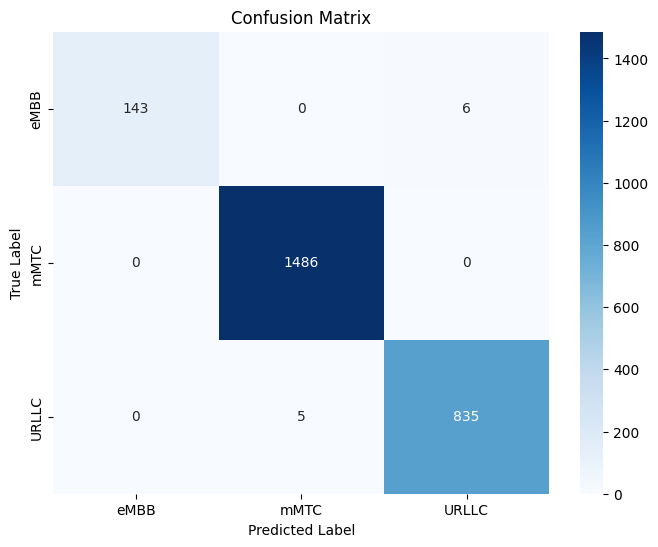

In [ ]:
# Split the data
X_ignore, X_temp, y_ignore, y_temp = train_test_split(X_top_features, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a new Random Forest model
rf_model_optmz_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_optmz_top_features.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_optmz_top_features.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_optmz_top_features, X_top_features, y, cv=cv, scoring=scoring)

# Print cross-validation results (Top Features)
print("\nCross-validation results (Top Features):")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **Class distribution analysis**

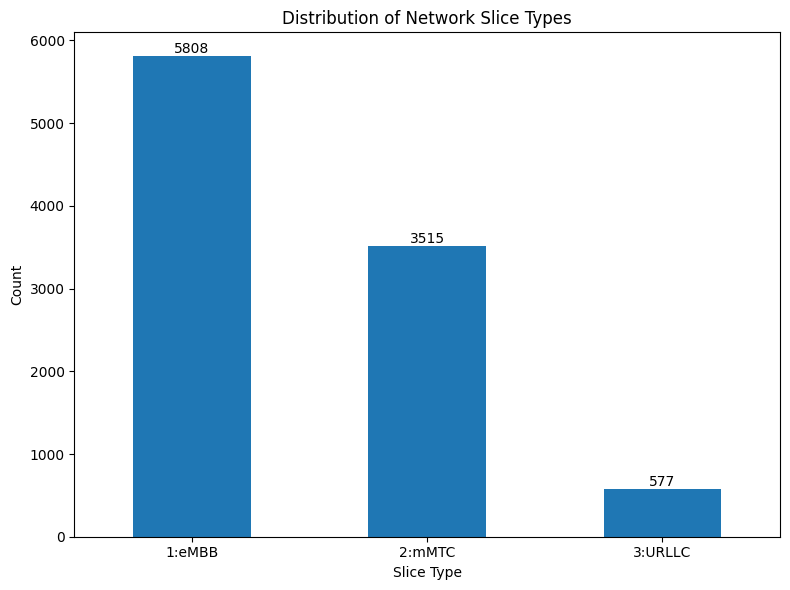

Percentage distribution of slice types:
SliceType
1:eMBB     58.666667
2:mMTC     35.505051
3:URLLC     5.828283
Name: count, dtype: float64


In [ ]:
# Count the occurrences of each slice type
slice_counts = df['SliceType'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
slice_counts.plot(kind='bar')
plt.title('Distribution of Network Slice Types')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(slice_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print percentage distribution
print("Percentage distribution of slice types:")
print(slice_counts / len(df) * 100)

## **Feature distribution analysis**

In [ ]:
df = X
df['SliceType'] = y
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,0,0,0,1,1,1,1,1,1,URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,0,0,0,1,1,1,1,1,1,URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

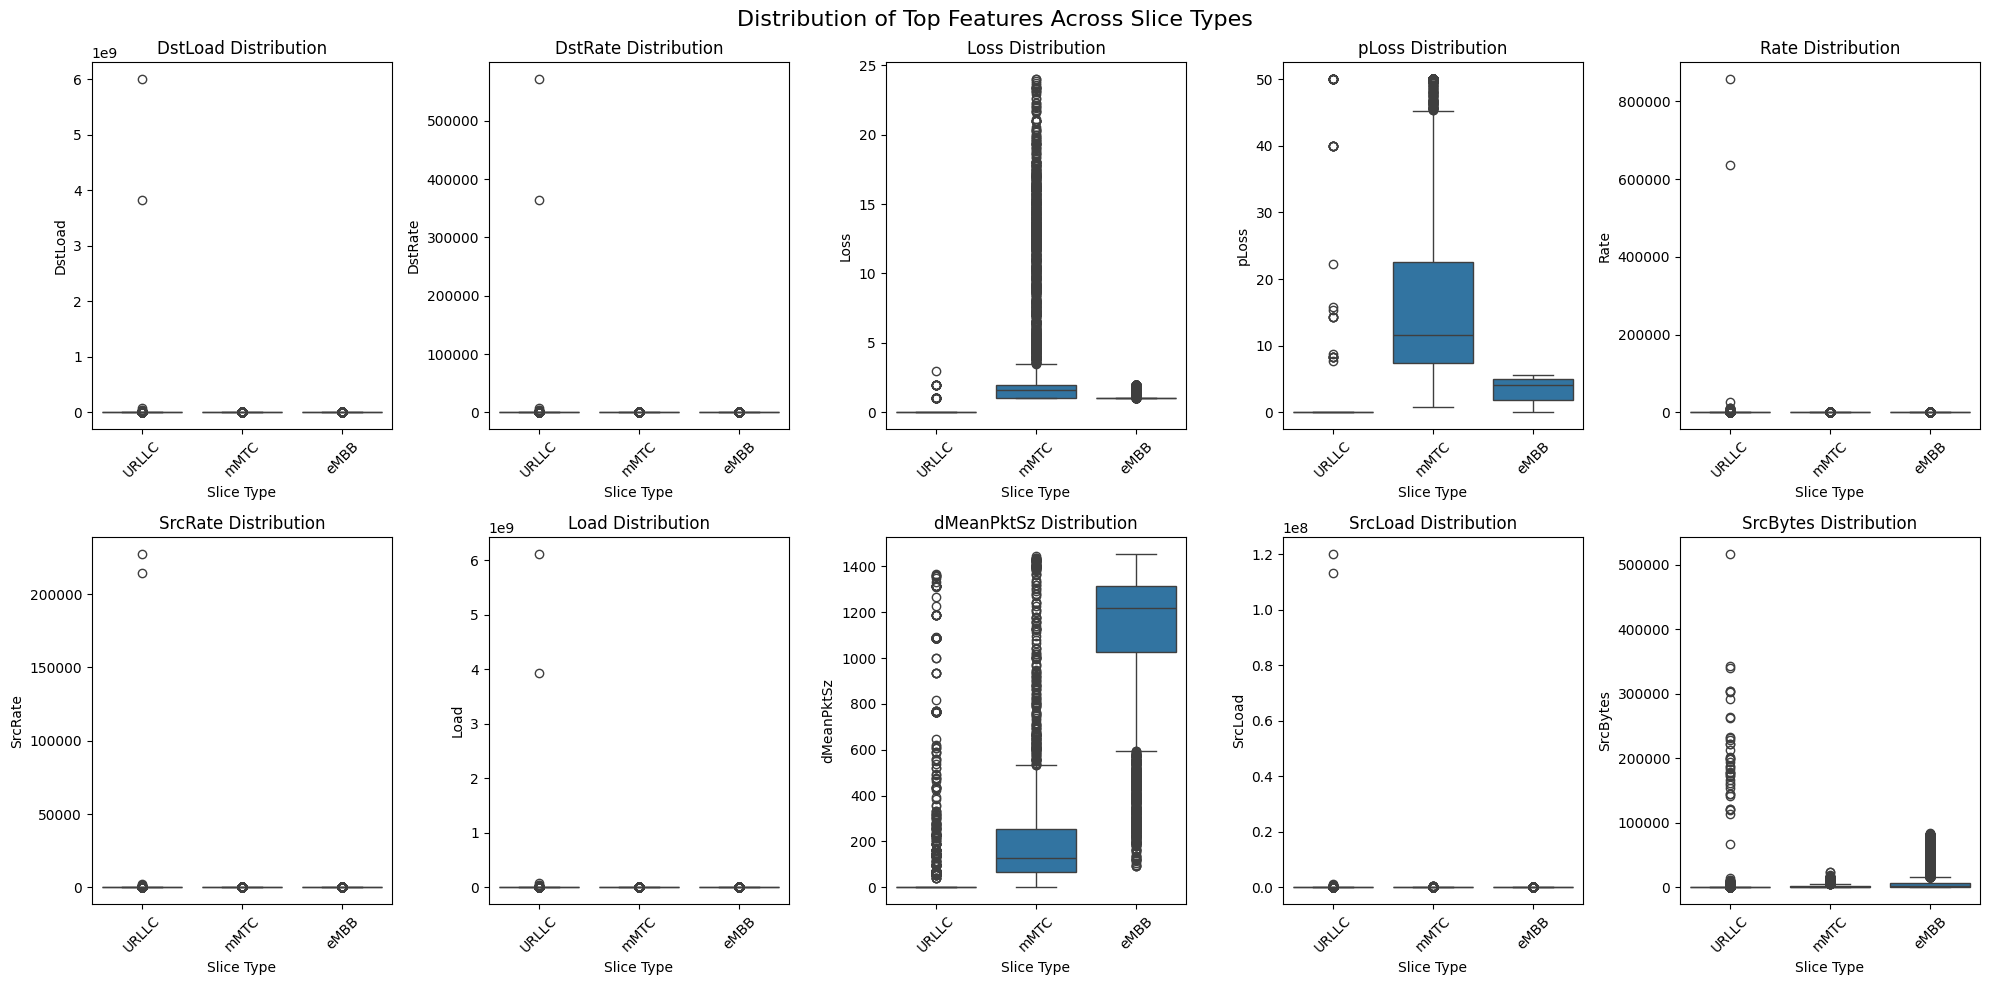

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

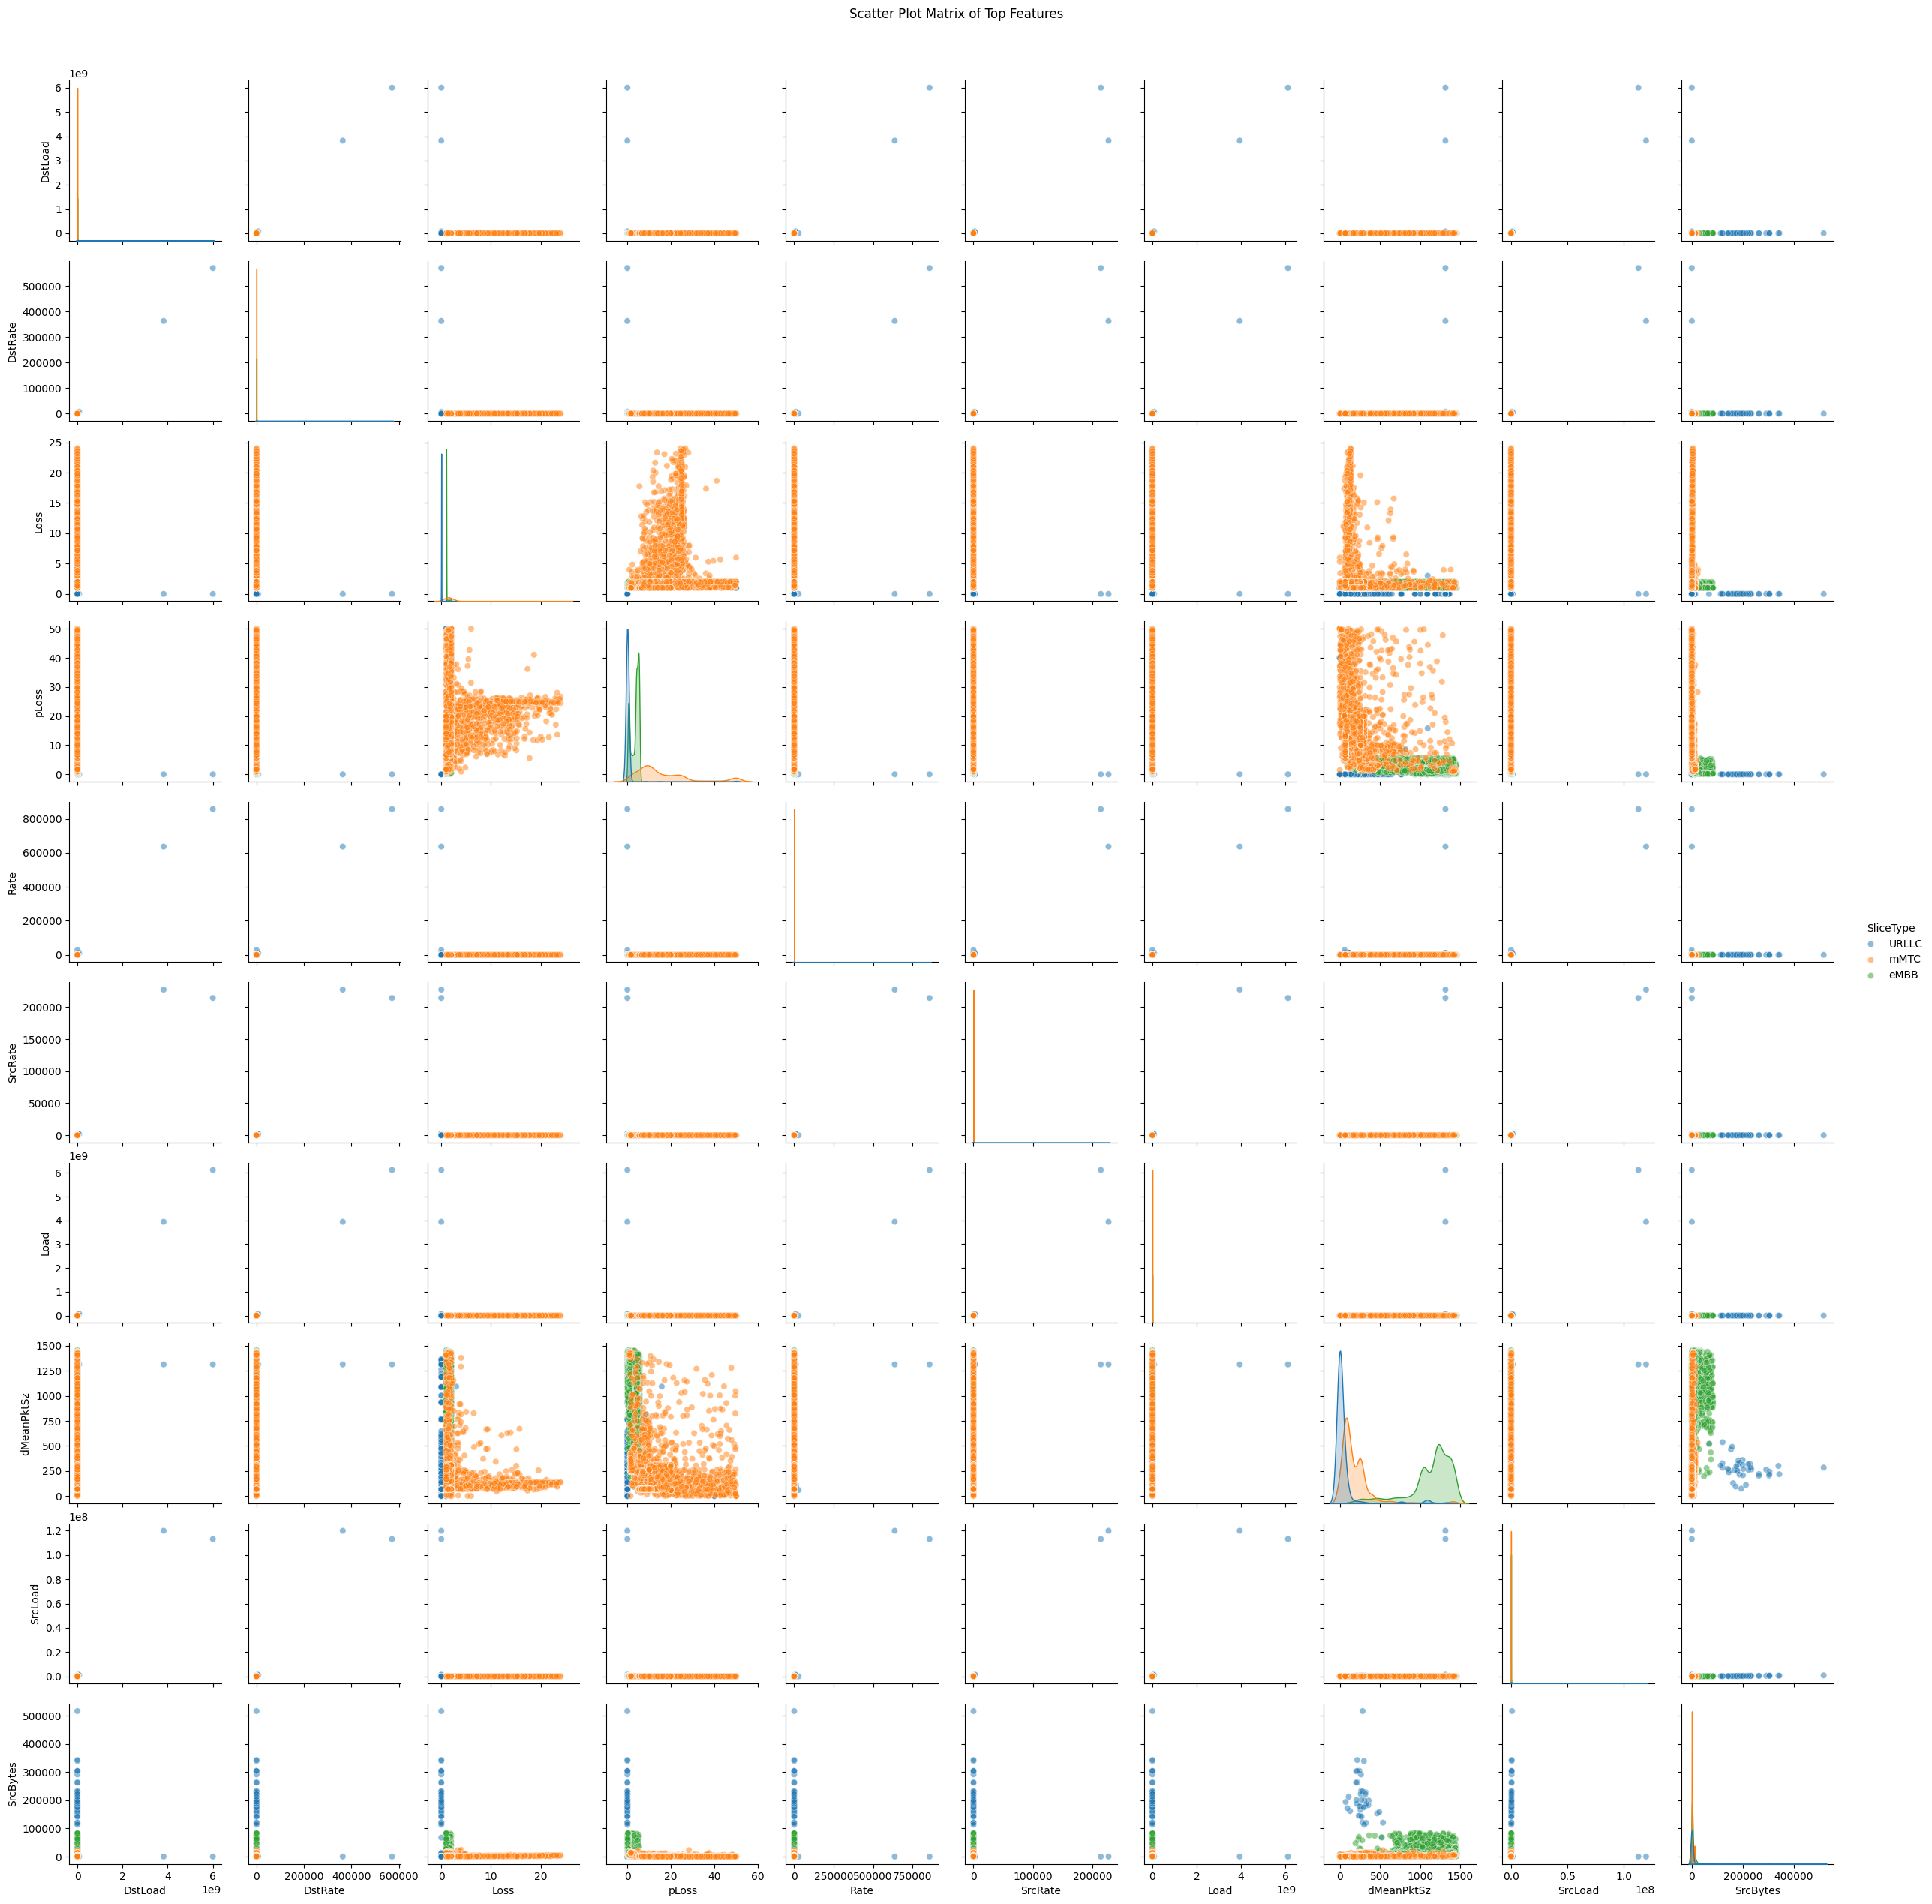

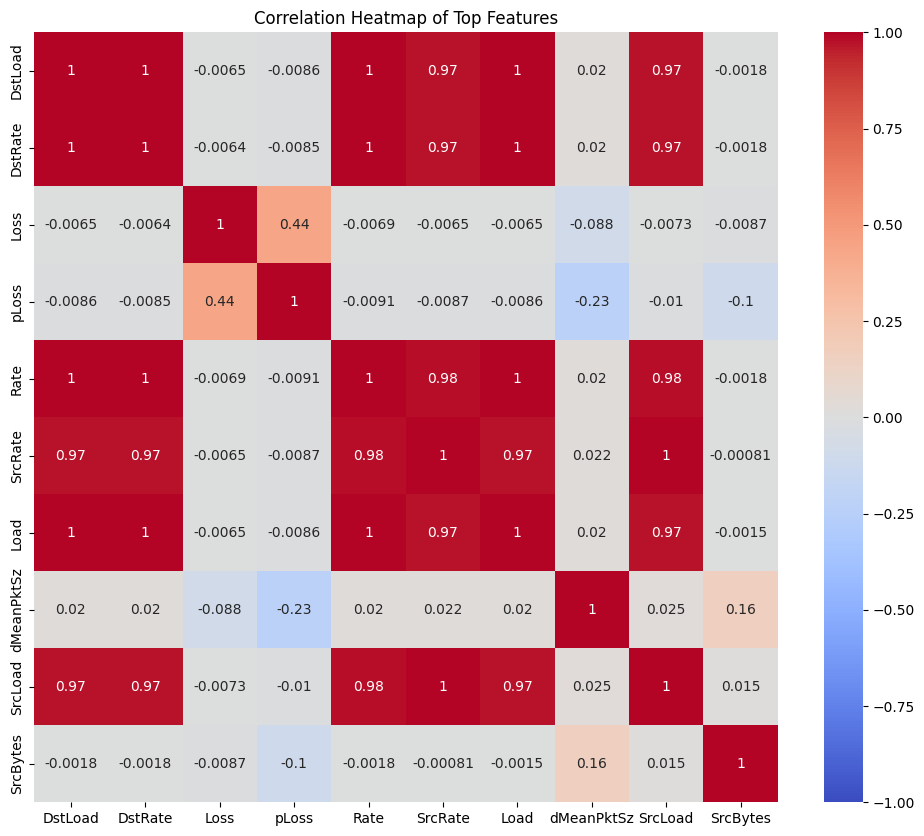

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Distribution of Top Features Across Slice Types', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each feature
for i, feature in enumerate(top_features):
    sns.boxplot(x='SliceType', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel('Slice Type')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(top_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Scatter plot matrix
sns.pairplot(df[top_features + ['SliceType']], hue='SliceType', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plot Matrix of Top Features', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = df[top_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Top Features')
plt.show()

# **Local Copy**

In [ ]:
df

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,0,0,0,1,1,1,1,1,1,URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,0,0,0,1,1,1,1,1,1,URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC


In [ ]:
# Save the dataset to a CSV file
output_path = '/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv'
df.to_csv(output_path, index=False)

# **Scaled features + Model evaluation**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,0,0,0,1,1,1,1,1,1,URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,0,0,0,1,1,1,1,1,1,URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC


In [ ]:
df = data.copy()

X = df.drop('SliceType', axis=1)
y = df['SliceType']

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# X_scaled

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now X_scaled_df contains your scaled features
X = X_scaled_df
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,UniqueID,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing
0,-1.461295,-0.364523,-0.495169,-0.494774,-0.498048,-0.487543,-0.498947,-0.501890,1.0,224.0,...,-0.475761,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.238965,0.079785,-0.495262,-0.494866,-0.498142,-0.487636,-0.499039,-0.501983,1.0,0.0,...,-0.451570,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.346596,2.625435,0.331115,0.323809,0.331618,0.336233,0.319130,0.325587,1.0,0.0,...,-0.455532,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-1.474476,-0.387722,-0.480410,-0.480153,-0.483229,-0.472829,-0.484335,-0.487109,1.0,0.0,...,-0.491412,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.509612,5.089372,-0.495262,-0.494866,-0.498142,-0.487636,-0.499039,-0.501983,1.0,0.0,...,-0.343350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,-0.021970,-0.394493,0.673233,0.771858,0.682364,0.825446,0.679945,0.689118,0.0,0.0,...,0.969511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14452,-0.022074,-0.393787,0.917345,0.453608,0.666767,0.758737,0.549347,0.494683,0.0,0.0,...,0.965436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14453,-0.021991,-0.394001,0.737200,0.677787,0.908523,0.965090,0.741700,0.824347,0.0,0.0,...,0.975992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14454,-0.022248,-0.399228,0.929598,0.816641,0.848923,0.896477,0.834530,0.969004,0.0,0.0,...,0.976358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Train a Random Forest model
rf_model_scaledX = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_scaledX.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_scaledX.predict(X_test)
y_pred

array(['URLLC', 'mMTC', 'mMTC', ..., 'URLLC', 'eMBB', 'mMTC'],
      dtype=object)

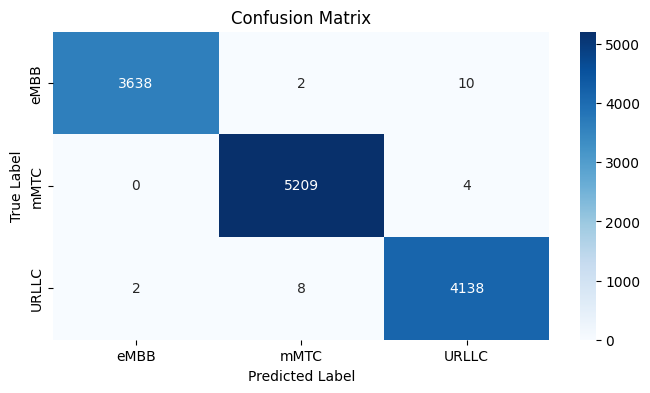

              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00      3650
        eMBB       1.00      1.00      1.00      5213
        mMTC       1.00      1.00      1.00      4148

    accuracy                           1.00     13011
   macro avg       1.00      1.00      1.00     13011
weighted avg       1.00      1.00      1.00     13011



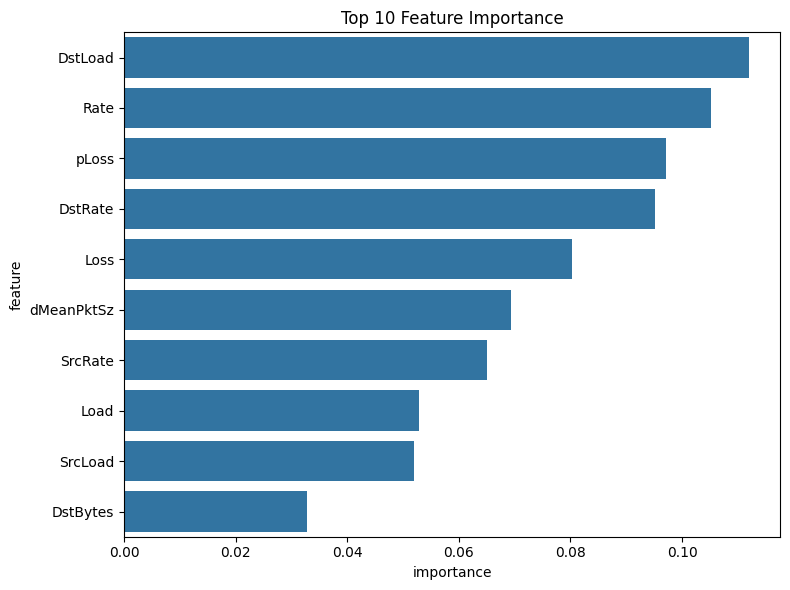


Top 10 Important Features:
       feature  importance
29     DstLoad    0.111965
36        Rate    0.105184
33       pLoss    0.097144
38     DstRate    0.095226
30        Loss    0.080217
26  dMeanPktSz    0.069373
37     SrcRate    0.064964
27        Load    0.052854
28     SrcLoad    0.051975
23    DstBytes    0.032831


In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_scaledX.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

## **Cross validation**

In [ ]:
# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_scaledX, X, y, cv=cv, scoring=scoring)

# Print cross-validation results
print("Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Scores: {scores}")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

Cross-validation results:
accuracy:
  Scores: [0.99861687 0.9996541  0.9986164  0.9989623  0.9986164 ]
  Mean: 0.998893
  Std Dev: 0.000403

precision_macro:
  Scores: [0.99870449 0.99963925 0.99856167 0.99892009 0.99870576]
  Mean: 0.998906
  Std Dev: 0.000384

recall_macro:
  Scores: [0.9985778  0.99958695 0.99872562 0.99901271 0.99839816]
  Mean: 0.998860
  Std Dev: 0.000415

f1_macro:
  Scores: [0.99864096 0.99961287 0.9986414  0.99896515 0.99855046]
  Mean: 0.998882
  Std Dev: 0.000392



## **Model trained on Top 20/10/5 important features**

In [ ]:
# Get the top features
top_features = feature_importance['feature'].head(10).tolist()

# Create a new dataset with only the top features
X_top_features = X[top_features]
X_top_features

,DstLoad,Rate,pLoss,DstRate,Loss,dMeanPktSz,SrcRate,Load,SrcLoad,DstBytes
0,-0.022518,71.182228,-0.559811,-0.143631,-0.901642,-0.170293,-0.252470,-0.043803,-0.321036,-0.161737
1,-0.022518,-0.220044,-0.559811,-0.143631,-0.901642,-0.224454,-0.252470,-0.043803,-0.321036,-0.166665
2,-0.022518,-0.211985,-0.559811,-0.143631,-0.901642,-0.224454,-0.234853,-0.043311,-0.313583,-0.166665
3,0.070776,2.022236,-0.559811,1.488793,-0.901642,-0.164275,1.708024,0.274565,3.173843,-0.150239
4,-0.022518,-0.220044,-0.559811,-0.143631,-0.901642,-0.224454,-0.252470,-0.043803,-0.321036,-0.166665
...,...,...,...,...,...,...,...,...,...,...
14451,-0.018909,-0.141192,0.862908,-0.083752,0.901642,-0.162925,-0.161384,-0.034741,-0.229419,-0.127362
14452,-0.019462,-0.143236,0.736819,-0.091042,0.232348,-0.163312,-0.160934,-0.034531,-0.232846,-0.132352
14453,-0.019092,-0.140792,0.898704,-0.082545,0.901642,-0.163063,-0.160576,-0.035236,-0.220252,-0.123882
14454,-0.019718,-0.153102,0.518517,-0.090749,0.549726,-0.163238,-0.171413,-0.035899,-0.244098,-0.126888


Classification Report:
              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00      3650
        eMBB       0.99      1.00      0.99      5213
        mMTC       1.00      0.98      0.99      4148

    accuracy                           0.99     13011
   macro avg       0.99      0.99      0.99     13011
weighted avg       0.99      0.99      0.99     13011


Cross-validation results (Top Features):
accuracy:
  Mean: 0.998132
  Std Dev: 0.000712

precision_macro:
  Mean: 0.998365
  Std Dev: 0.000646

recall_macro:
  Mean: 0.998038
  Std Dev: 0.000780

f1_macro:
  Mean: 0.998199
  Std Dev: 0.000713



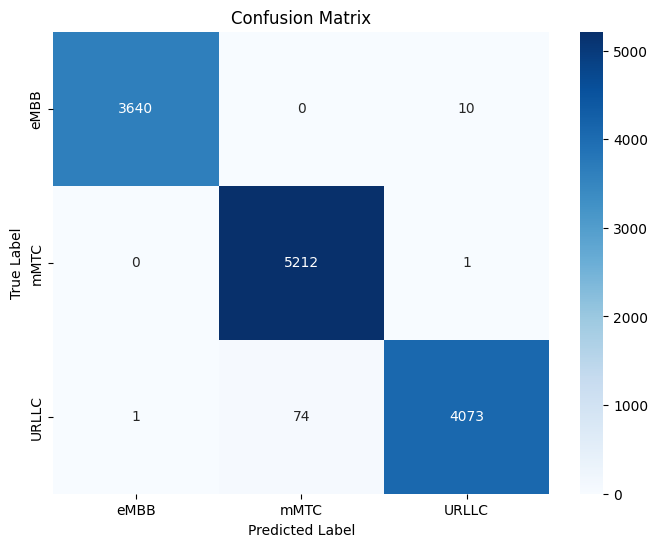

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.9, random_state=42)

# Train a new Random Forest model
rf_model_scaledX_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_scaledX_top_features.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_scaledX_top_features.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model_scaledX_top_features, X_top_features, y, cv=cv, scoring=scoring)

# Print cross-validation results (Top Features)
print("\nCross-validation results (Top Features):")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Mean: {scores.mean():.6f}")
        print(f"  Std Dev: {scores.std():.6f}")
        print()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# **Non-top features**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing,SliceType
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,0,0,0,1,1,1,1,1,1,URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,0,0,0,1,1,1,1,1,1,URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,1,1,1,1,1,1,1,1,1,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0.0,...,0,0,0,0,0,0,0,0,0,mMTC


In [ ]:
df = data.copy()

X = df.drop('SliceType', axis=1)
y = df['SliceType']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred

array(['URLLC', 'mMTC', 'mMTC', ..., 'URLLC', 'eMBB', 'eMBB'],
      dtype=object)

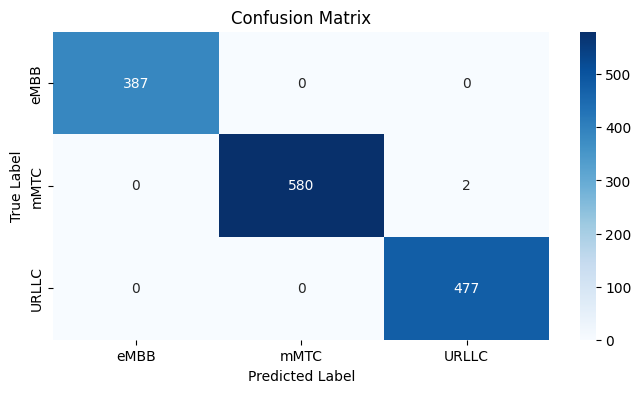

              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00       387
        eMBB       1.00      1.00      1.00       582
        mMTC       1.00      1.00      1.00       477

    accuracy                           1.00      1446
   macro avg       1.00      1.00      1.00      1446
weighted avg       1.00      1.00      1.00      1446



In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(8,6))
# sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
# plt.title('Top 10 Feature Importance')
# plt.tight_layout()
# plt.show()

# print("\nTop 10 Important Features:")
# print(feature_importance.head(10))

## Drop top features

In [ ]:
X.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,UniqueID,dTos_missing,dTtl_missing,dHops_missing,SrcGap_missing,DstGap_missing,SrcWin_missing,DstWin_missing,SrcTCPBase_missing,DstTCPBase_missing
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224.0,...,144379.0,0,0,0,1,1,1,1,1,1
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,181691.0,1,1,1,1,1,1,1,1,1
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0.0,...,175580.0,1,1,1,1,1,1,1,1,1
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0.0,...,120239.0,0,0,0,1,1,1,1,1,1
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.0,...,348612.0,1,1,1,1,1,1,1,1,1


In [ ]:
top_features = feature_importance['feature'].head(40).tolist()
top_features

['DstLoad',
 'pLoss',
 'DstRate',
 'Loss',
 'Rate',
 'dMeanPktSz',
 'SrcRate',
 'Load',
 'SrcLoad',
 'DstBytes',
 'SrcBytes',
 'TotBytes',
 'SrcWin',
 'DstPkts',
 'TotPkts',
 'SrcPkts',
 'SrcWin_missing',
 'SrcLoss',
 'SrcGap_missing',
 'DstWin',
 'SrcTCPBase_missing',
 'Dur',
 'dDSb',
 'Min',
 'RunTime',
 'State',
 'sMeanPktSz',
 'DstWin_missing',
 'UniqueID',
 'DstGap_missing',
 'Proto',
 'dTtl_missing',
 'Max',
 'AckDat',
 'Mean',
 'DstTCPBase_missing',
 'DstLoss',
 'TcpRtt',
 'Sum',
 'dTos_missing']

In [ ]:
X = X.drop(top_features, axis=1)
X.head()

,X,Seq,sTos,dTos,sDSb,sTtl,dTtl,sHops,dHops,Cause,Offset,SrcGap,DstGap,SrcTCPBase,DstTCPBase,SynAck,dHops_missing
0,34555.0,982.0,224.0,184.000000,6,250.0,255.000000,6.0,1.000000,1,163876.0,0.0,0.0,3.904204e+09,3.704605e+09,0.0,0
1,531568.0,11362.0,0.0,0.257735,4,249.0,72.421437,7.0,5.931325,1,1714024.0,0.0,0.0,1.836252e+09,2.446250e+09,0.0,1
2,360399.0,70834.0,0.0,0.257735,4,63.0,72.421437,1.0,5.931325,2,26304452.0,0.0,0.0,1.836252e+09,2.446250e+09,0.0,1
3,30702.0,440.0,0.0,0.000000,4,64.0,117.000000,0.0,11.000000,2,660484.0,0.0,0.0,9.797546e+07,3.508802e+09,0.0,0
4,312747.0,128397.0,0.0,0.257735,4,63.0,72.421437,1.0,5.931325,1,22285688.0,0.0,0.0,1.836252e+09,2.446250e+09,0.0,1


In [ ]:
# Removing 80% of the data
X_temp, X_drop, y_temp, y_drop = train_test_split(X, y, test_size=0.8, random_state=42)

# Split the 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.9, random_state=42)

# Train a Random Forest model
rf_model_no_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_no_top_features.fit(X_train, y_train)

# Make predictions
y_pred = rf_model_no_top_features.predict(X_test)
y_pred

array(['URLLC', 'URLLC', 'mMTC', ..., 'eMBB', 'eMBB', 'mMTC'],
      dtype=object)

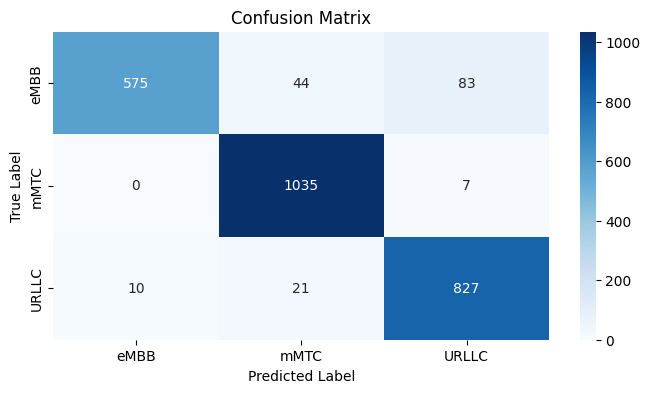

              precision    recall  f1-score   support

       URLLC       0.98      0.82      0.89       702
        eMBB       0.94      0.99      0.97      1042
        mMTC       0.90      0.96      0.93       858

    accuracy                           0.94      2602
   macro avg       0.94      0.93      0.93      2602
weighted avg       0.94      0.94      0.94      2602



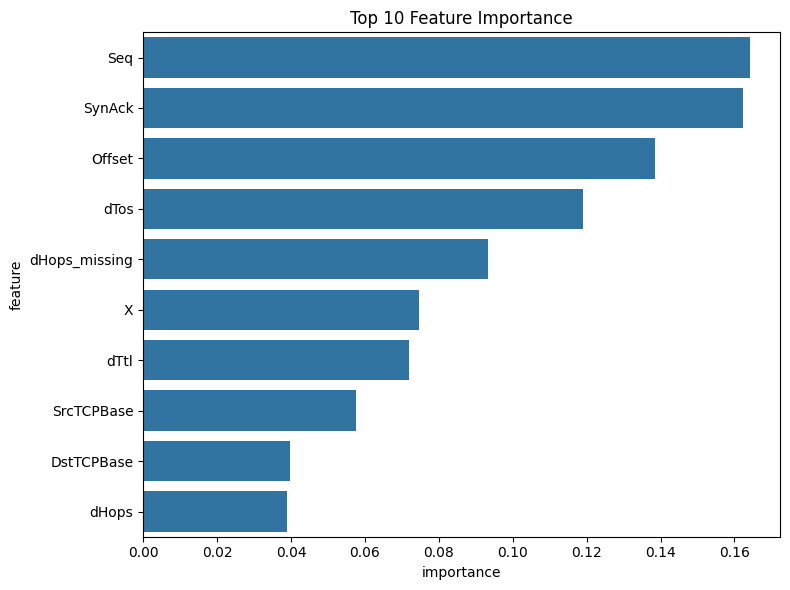


Top 10 Important Features:
          feature  importance
1             Seq    0.164117
15         SynAck    0.162325
10         Offset    0.138602
3            dTos    0.119151
16  dHops_missing    0.093329
0               X    0.074688
6            dTtl    0.071855
13     SrcTCPBase    0.057641
14     DstTCPBase    0.039634
8           dHops    0.038825


In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_no_top_features.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))